# Librerias

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from mpl_toolkits import mplot3d

# Tratando datos
## El unico
Como esta dataset esta separado en varias carpeta lo que he decidido es por cada categoria crear un unico fichero donde se agrupe todo los datos de esta categoria

In [4]:
all_files_idle = glob.glob("data/idle/*.csv")
all_files_running = glob.glob("data/running/*.csv")
all_files_stairs = glob.glob("data/stairs/*.csv")
all_files_walking = glob.glob("data/walking/*.csv")

df_from_each_file_idle = (pd.read_csv(f) for f in all_files_idle)
df_from_each_file_running = (pd.read_csv(f) for f in all_files_running)
df_from_each_file_stairs = (pd.read_csv(f) for f in all_files_stairs)
df_from_each_file_walking = (pd.read_csv(f) for f in all_files_walking)

df_idle = pd.concat(df_from_each_file_idle, axis=0, ignore_index=True)
df_running = pd.concat(df_from_each_file_running, axis=0, ignore_index=True)
df_stairs = pd.concat(df_from_each_file_stairs, axis=0, ignore_index=True)
df_walking = pd.concat(df_from_each_file_walking, axis=0, ignore_index=True)

Generamos nuestro dataset (los 4 ficheros convertidos a 1) y printamos los 5 primeros elementos

In [5]:
df = pd.concat([df_idle, df_running, df_stairs, df_walking], axis=0, ignore_index=True)
df.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195


## Entender los datos
Miramos que no tengamos nulos antes de todo

In [6]:
df.isnull().sum()

accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
dtype: int64

Mostramos descripcion de cada una para asi saber en que valores se encutran

In [7]:
print("IDLE", df_idle.describe(),"\n")
print("RUNNING",df_running.describe(),"\n")
print("STAIRS", df_stairs.describe(),"\n")
print("WALKING",df_walking.describe(),"\n")
print("DATASET", df.describe(),"\n")

IDLE        accelerometer_X  accelerometer_Y  accelerometer_Z
count     31170.000000     31170.000000     31170.000000
mean          0.096767         2.225971         8.973247
std           0.691892         2.821235         1.211058
min         -10.448297        -2.595315        -0.296881
25%          -0.110133        -0.028730         8.116344
50%           0.234632         0.028730         9.749189
75%           0.277727         5.310340         9.773131
max           8.135497         9.916783        21.988348 

RUNNING        accelerometer_X  accelerometer_Y  accelerometer_Z
count    102240.000000    102240.000000    102240.000000
mean          5.045705         8.083135         1.387356
std           9.952696        12.441402         7.004236
min         -39.188293       -39.188293       -39.188293
25%          -1.532289        -0.742202        -2.873042
50%           3.605668         7.967903         0.407014
75%           9.595961        16.385916         4.769250
max          39.

Informacion de los datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
dtypes: float64(3)
memory usage: 4.4 MB


In [9]:
def plot_3d_trajectory(i, x, y, z, title="3d trayectoria"):
    x = cumtrapz(x)
    y = cumtrapz(y)
    z = cumtrapz(z)
    
    fig3,ax = plt.subplots()
    fig3.suptitle(title,fontsize=20)
    ax = plt.axes(projection='3d')
    ax.plot3D(x,y,z)
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    ax.set_zlabel('Z position')

In [10]:
def plot_3d_scatter(x, y, z, title="3d puntos"):
    # Creating color map
    my_cmap = plt.get_cmap('hsv')
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
 
    sctt = ax.scatter3D(x, y, z,
                        alpha = 0.8,
                        c = (x+y+z),
                        cmap = my_cmap,
                        marker ='^')
                        
    plt.title(title)
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    ax.set_zlabel('Eje z')
    fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
    plt.show()

<IPython.core.display.Javascript object>


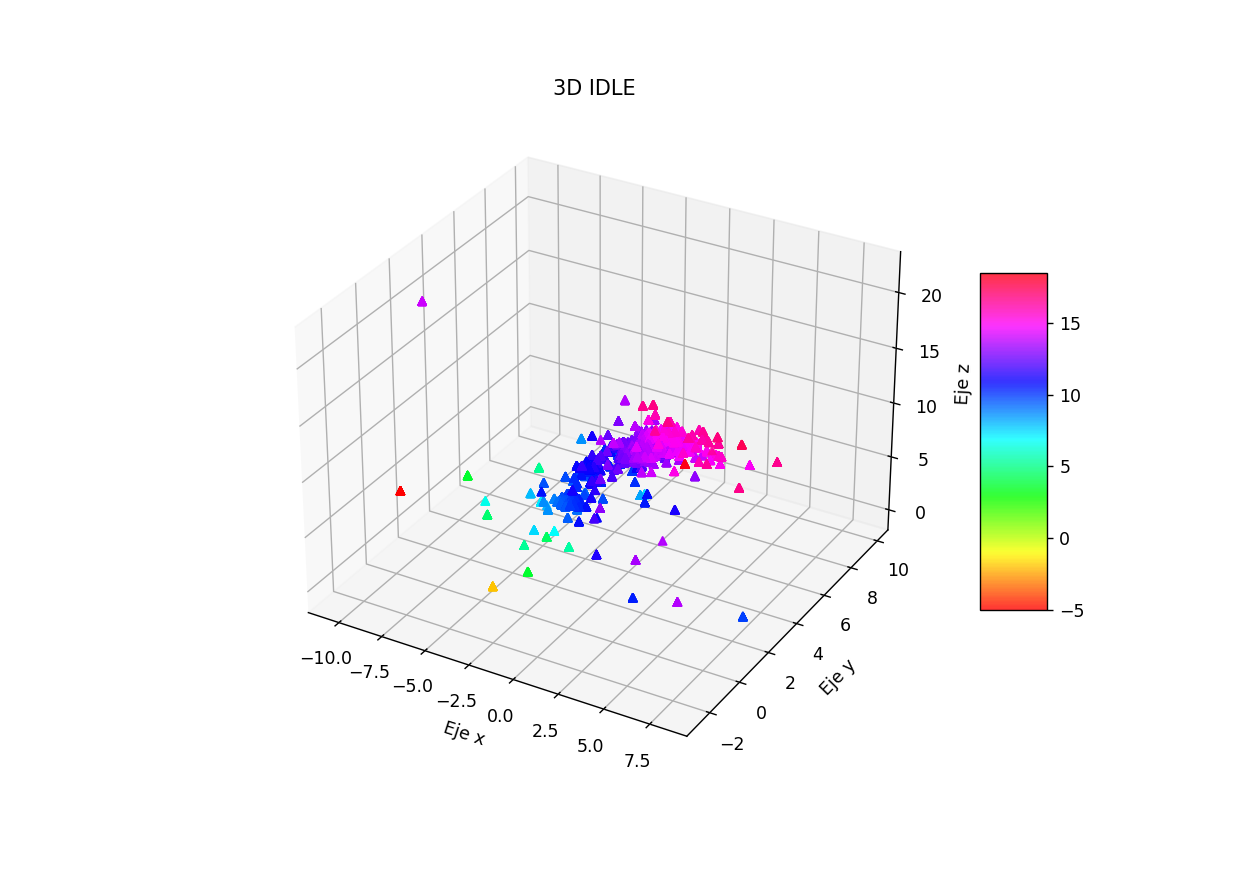

<IPython.core.display.Javascript object>


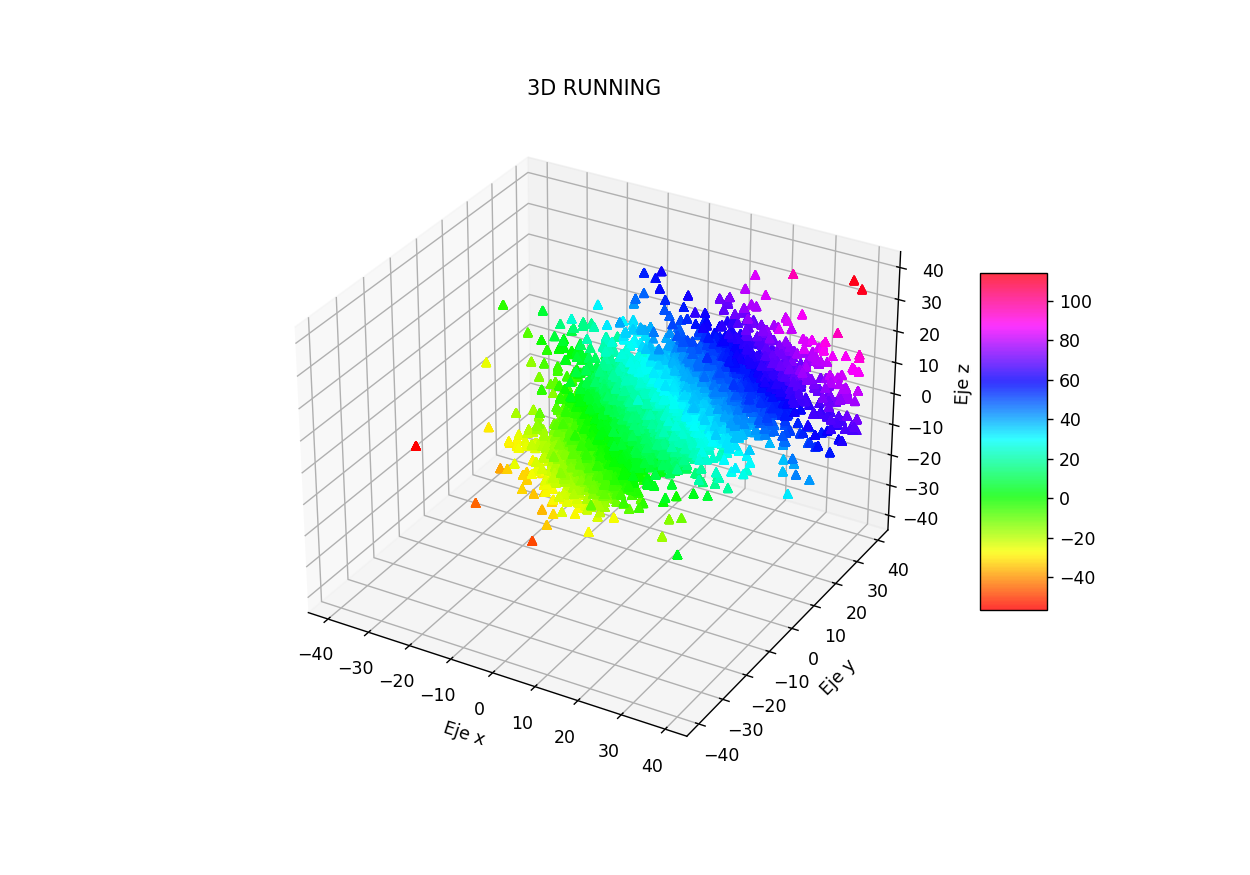

<IPython.core.display.Javascript object>


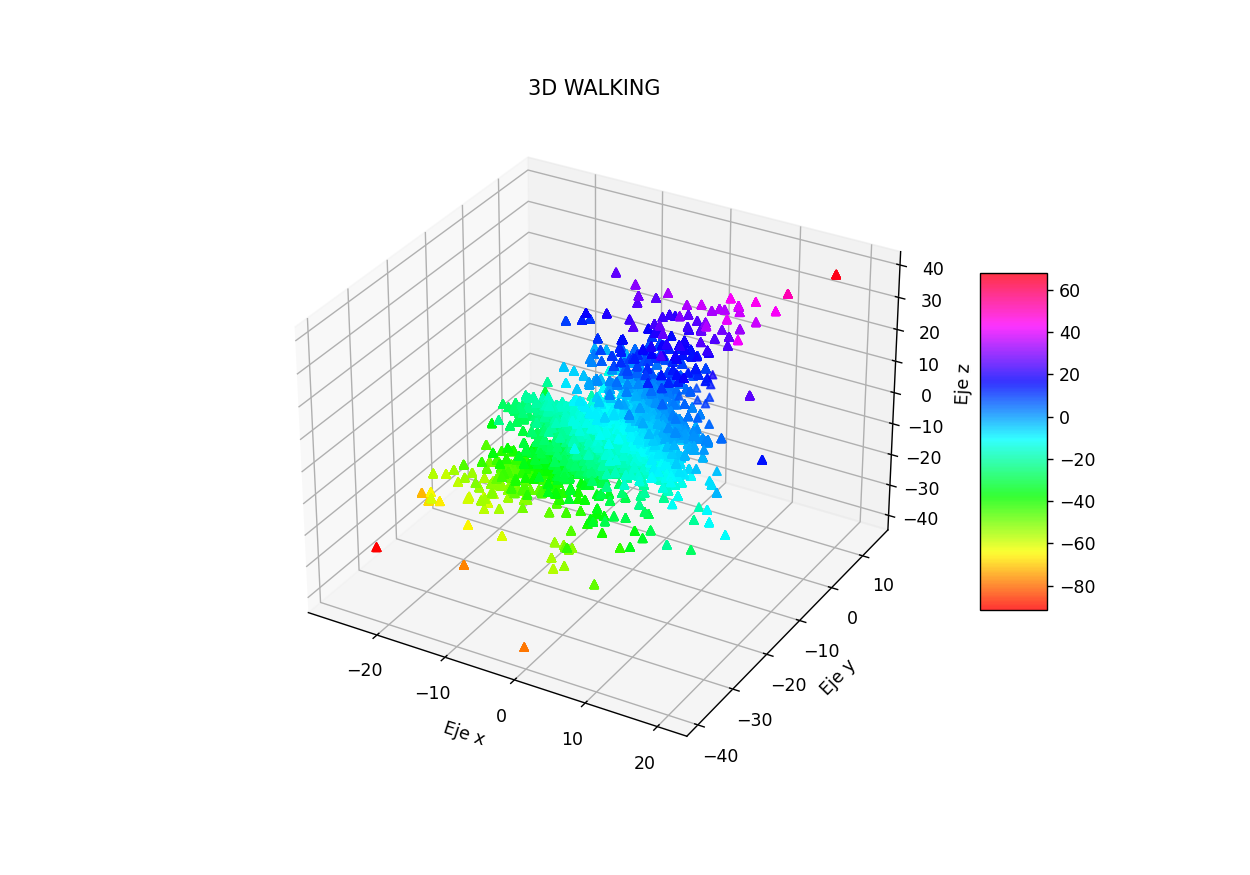

<IPython.core.display.Javascript object>


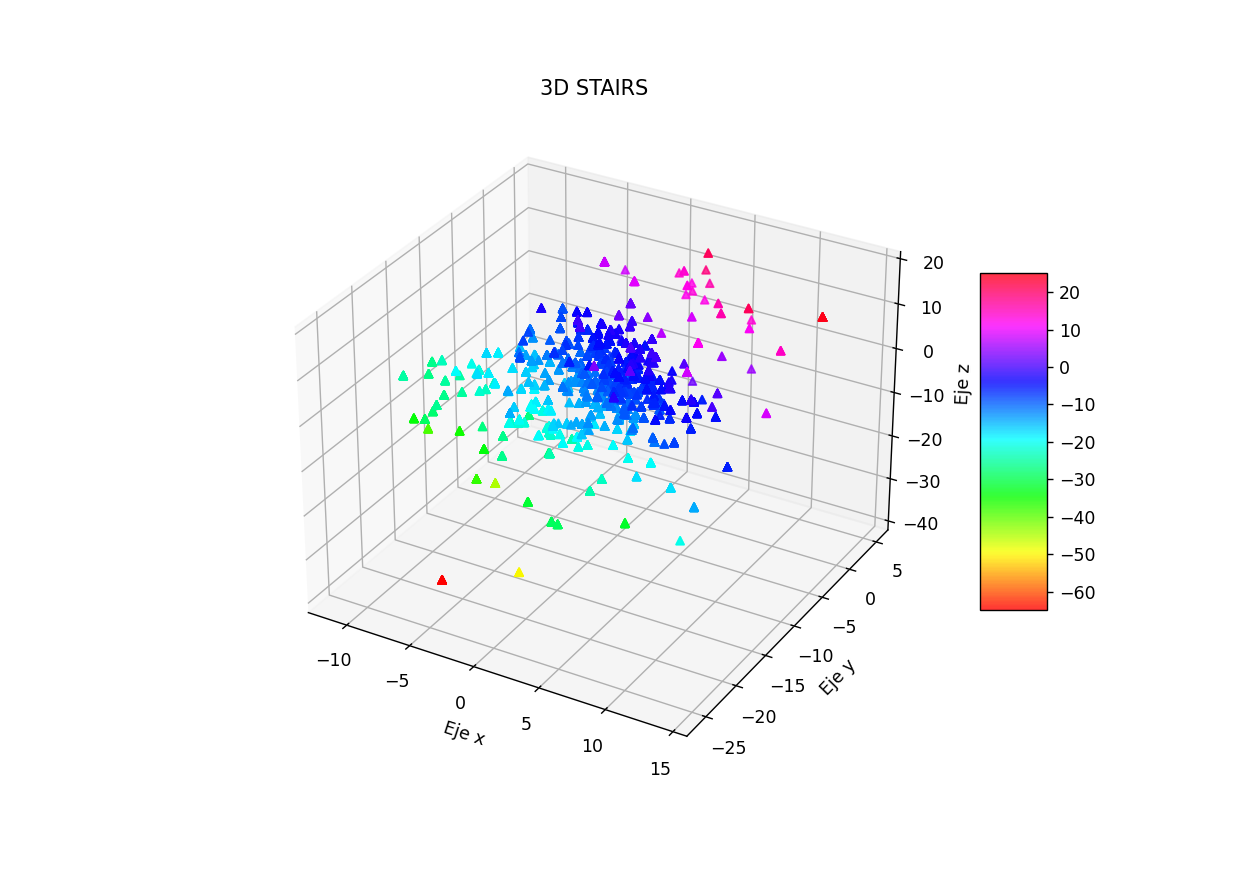

<IPython.core.display.Javascript object>


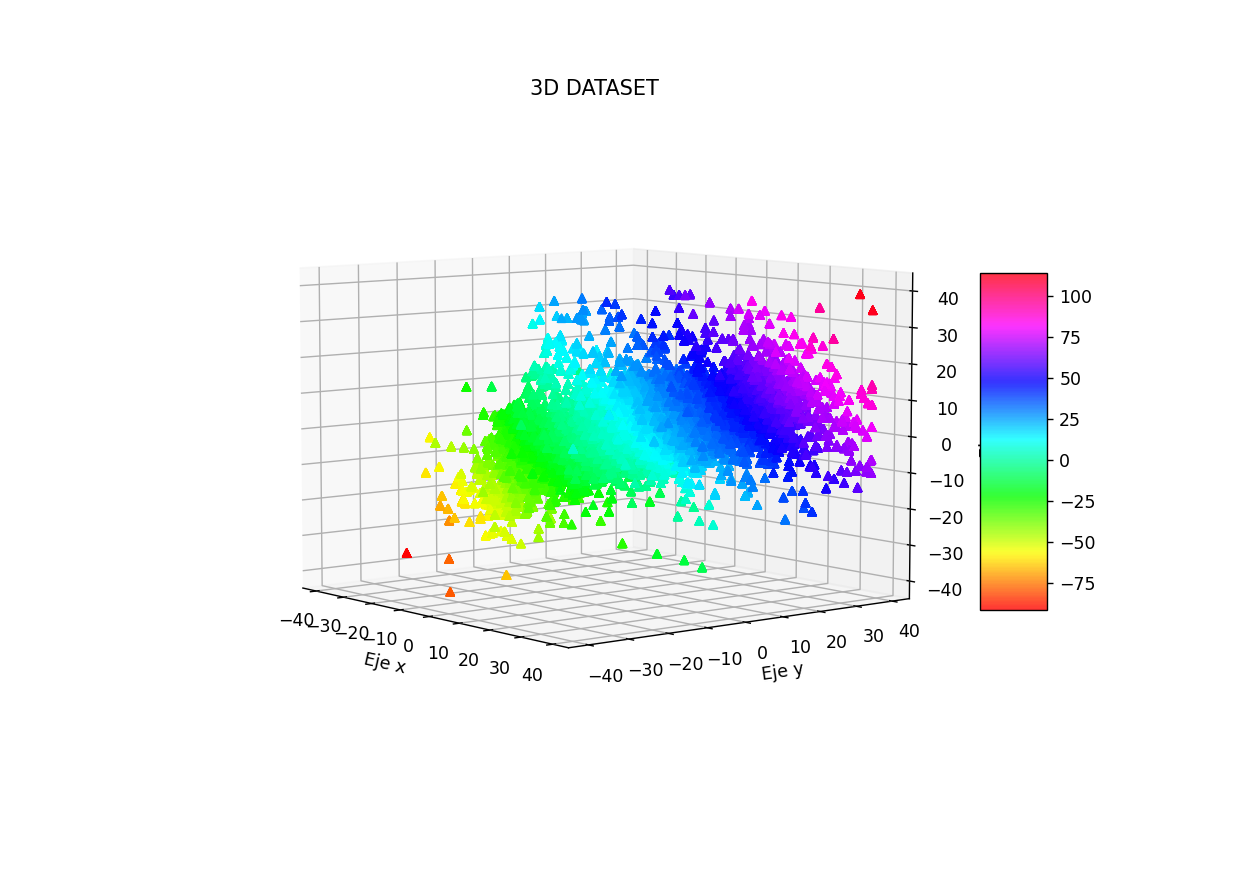

In [11]:
plot_3d_scatter(df_idle['accelerometer_X'], df_idle['accelerometer_Y'], df_idle['accelerometer_Z'], "3D IDLE")
plot_3d_scatter(df_running['accelerometer_X'], df_running['accelerometer_Y'], df_running['accelerometer_Z'], "3D RUNNING")
plot_3d_scatter(df_walking['accelerometer_X'], df_walking['accelerometer_Y'], df_walking['accelerometer_Z'], "3D WALKING")
plot_3d_scatter(df_stairs['accelerometer_X'], df_stairs['accelerometer_Y'], df_stairs['accelerometer_Z'], "3D STAIRS")
plot_3d_scatter(df['accelerometer_X'], df['accelerometer_Y'], df['accelerometer_Z'], "3D DATASET")